In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define the risk occurrence methods
* Triangular Distribution - Here the Probability of occurrence per year is the mode and the left and the right.
* Normal Distribution - The cyber threats is assumed to be in the range of 90% confidence level for the normal distribution that is why the formula can be used to calculate mean and std (Santini, P et.al, 2019)
$$
\mu = \frac{log(max\_value)+ log(min\_value)}{2} $$
$$\sigma =\frac{log(max\_value)- log(min\_value)}{3.29}
$$
* Poisson Distribution - The mean of the occurrence of the threat is used to calculate the values

In [2]:
def calculate_if_risk_occurs_triangular(attack_probability):
    probability = np.random.triangular(0, attack_probability, 1)
    return (np.random.rand()) < probability

In [31]:
def calculate_if_risk_occurs_normal(lower, upper):
    mean = (np.log(lower) + np.log(upper)) / 2.0
    std_dv = (np.log(upper) - np.log(lower)) / 3.29

    return (np.random.rand()) < np.random.lognormal(mean, std_dv)

In [44]:
def calculate_if_risk_occurs_poisson(mean):
    return (np.random.rand()) < np.random.poisson(mean)

In [14]:
def get_loss_amount(lower, upper):
    mean = (np.log(lower) + np.log(upper)) / 2.0
    std_dv = (np.log(upper) - np.log(lower)) / 3.29
    return np.random.lognormal(mean, std_dv)

## Simulate total loss
The total loss is calculated according to the probability distribution table and then added to the total amount

In [50]:
def simulate_risk_portfolio(risk):
    total_loss_amount = 0
    if risk["distribution"] == "triangular":
        if calculate_if_risk_occurs_triangular(risk["probability"]):
            total_loss_amount += get_loss_amount(risk["lower"], risk["upper"])
    elif risk["distribution"] == "normal":
        if calculate_if_risk_occurs_normal(risk["lower_occ"], risk["upper_occ"]):
            total_loss_amount += get_loss_amount(risk["lower"], risk["upper"])
    elif risk["distribution"] == "poisson":
        if calculate_if_risk_occurs_poisson(risk["mean"]):
            total_loss_amount += get_loss_amount(risk["lower"], risk["upper"])
    return total_loss_amount

In [5]:
def monte_carlo_simulation(cyber_risks, iterations):
    yearly_losses = []
    for i in range(iterations):
        loss_amount = simulate_risk_portfolio(cyber_risks)
        yearly_losses.append(loss_amount)
    return yearly_losses

In [ ]:
def calculate_loss_exceedance_prob(losses, risk, labels):
    losses_np = np.array(losses)
    sorted_losses = np.sort(losses_np[losses_np != 0])
    num_losses = len(sorted_losses)
    exceedance_probs = [((num_losses - i) / (num_losses + 1)*100 )for i in range(num_losses)]

    # Plot the loss exceedance curve
    plt.plot(sorted_losses, exceedance_probs)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel(f'Loss for cyber risks in pounds')
    plt.ylabel('Exceedance Probability in %')
    plt.yticks(np.arange(0, 105, 5))
    # plt.xlim(0, risk["xlim"])
    plt.legend(labels=labels)
    plt.xlim(0, 150000)
    # plt.xticks(np.arange(0, risk["upper"], risk["xticks"]))
    # plt.title('Loss Exceedance Curve')
    plt.grid(True)

In [ ]:
def print_simulation_to_loss(losses, risk):
    no_of_simulations = np.arange(len(losses))
    plt.figure(figsize=(10, 10))

    plt.title('Monte-Carlo Distributions')
    plt.xlabel(f'Loss for {risk["name"]}')
    plt.ylabel(f'Simulation number')
    plt.plot(no_of_simulations, losses)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

In [ ]:
cs = [{
    "name": "DDoS",
    "probability": 0.2,
    "lower": 10000,
    "upper": 227308,
    "xlim": 247308,
    "xticks": 30000,
    "distribution": "triangular"
},
{
    "name": "Ransomeware",
    "upper_occ": 30,
    "lower_occ": 5,
    "lower": 1000,
    "upper": 133638,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "normal"

},
{
    "name": "Insider threat",
    "upper_occ": 40,
    "lower_occ": 21,
    "lower": 10000,
    "upper": 124000,
    "xlim": 124000,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Phishing Attack",
    "upper_occ": 19.45,
    "lower_occ": 11,
    "lower": 1000,
    "upper": 22430,
    "xlim": 22430,
    "xticks": 1500,
    "distribution": "normal"
},
{
    "name": "Spam",
    "mean": 5.22,
    "lower": 500,
    "upper": 22430,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
},
{
    "name": "Unauthorized access",
    "mean": 4,
    "lower": 500,
    "upper": 22430,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
}
]

 Avg loss for DDoS costs 29993.90924834379
 Avg loss for Ransomeware costs 34210.387063893846
 Avg loss for Insider threat costs 46575.66824088943
 Avg loss for Phishing Attack costs 7559.451661173438
 Avg loss for Spam costs 6485.8880465684315
 Avg loss for Unauthorized access costs 6452.012137643486
 Avg loss for total costs 131277.3163985122


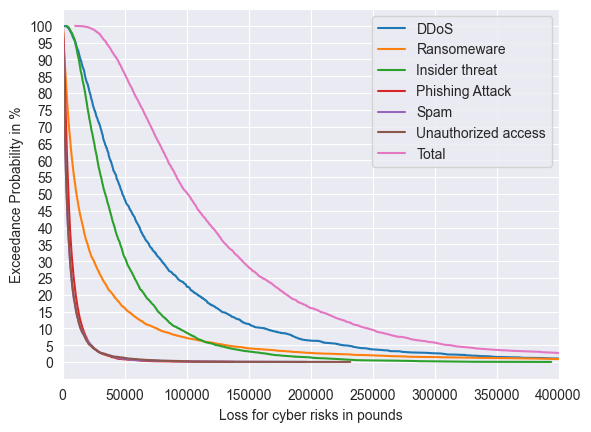

In [94]:
ITERATIONS = 5000
total_costs = np.zeros(ITERATIONS)
labels = []
for risk in cs:
    yearly_losses = monte_carlo_simulation(risk, iterations=ITERATIONS)
    labels.append(risk["name"])
    print(f' Avg loss for {risk["name"]} costs {sum(yearly_losses) / ITERATIONS}')
    calculate_loss_exceedance_prob(yearly_losses, risk, labels)
    yearly_losses_np = np.array(yearly_losses)
    total_costs = np.add(total_costs, yearly_losses_np)
    #print_simulation_to_loss(yearly_losses, risk)
labels.append("Total")
print(f' Avg loss for total costs {sum(total_costs) / ITERATIONS}')
calculate_loss_exceedance_prob(total_costs, risk, labels)
plt.show()